In [522]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1.	Загрузити датасет, що містить інформацію про відвідуваність музеїв в різні роки.

In [523]:
data = pd.read_csv('museum_visitors.csv', delimiter=',')

2.	Вивести перші 5 рядків датасету.

In [524]:
data.head()

,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
0,2014-01-01,24778,4486,1581,6602
1,2014-02-01,18976,4172,1785,5029
2,2014-03-01,25231,7082,3229,8129
3,2014-04-01,26989,6756,2129,2824
4,2014-05-01,36883,10858,3676,10694


3.	Провести попередній аналіз даних (визначити розмір датасету, тип даних, кількість пропусків).

In [525]:
data.shape

(59, 5)

In [526]:
data.dtypes

Date                                    object
Avila Adobe                              int64
Firehouse Museum                         int64
Chinese American Museum                  int64
America Tropical Interpretive Center     int64
dtype: object

In [527]:
data.isnull().sum()

Date                                    0
Avila Adobe                             0
Firehouse Museum                        0
Chinese American Museum                 0
America Tropical Interpretive Center    0
dtype: int64

4.	Перевірити наявність дублікатів. Якщо є, видалити їх і вивести розмір таблиці (без дублікатів).

In [528]:
data = data.drop_duplicates()
data.shape

(59, 5)

5.	Про які роки містить інформацію датасет.

In [529]:
years = pd.to_datetime(data['Date']).dt.year.unique()
years

array([2014, 2015, 2016, 2017, 2018])

6.	Змінити назви столбців. Замінити великі букви на маленьки, пробіли на підкреслення (date, avila_adobe, firehouse_museum, chinese_american_museum, america_tropical_interpretive_center).

In [530]:
data = data.rename(columns={
    'Date': 'date',
    'Avila Adobe': 'avila_adobe',
    'Firehouse Museum': 'firehouse_museum',
    'Chinese American Museum': 'chinese_american_museum',
    'America Tropical Interpretive Center': 'america_tropical_interpretive_center'
})
data.head()

,date,avila_adobe,firehouse_museum,chinese_american_museum,america_tropical_interpretive_center
0,2014-01-01,24778,4486,1581,6602
1,2014-02-01,18976,4172,1785,5029
2,2014-03-01,25231,7082,3229,8129
3,2014-04-01,26989,6756,2129,2824
4,2014-05-01,36883,10858,3676,10694


7.	Обчислити середню кількість відвідувачів для кожного музею протягом всього періоду.

In [531]:
museum_columns = ['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']
museum_means = data[museum_columns].mean()
museum_means

avila_adobe                             24061.661017
firehouse_museum                         6472.830508
chinese_american_museum                  2721.254237
america_tropical_interpretive_center     7107.016949
dtype: float64

8.	Знайти мінімальну та максимальну кількість відвідувачів для кожного музею за 2018 рік

In [532]:
min_2018 = data[data['date'].str.startswith('2018')].min()
max_2018 = data[data['date'].str.startswith('2018')].max()
print('Мінімальна кількість відвідувачів за 2018 рік:\n', min_2018)
print('Максимальна кількість відвідувачів за 2018 рік:\n', max_2018)

Мінімальна кількість відвідувачів за 2018 рік:
 date                                    2018-01-01
avila_adobe                                  14718
firehouse_museum                              3306
chinese_american_museum                       2146
america_tropical_interpretive_center          3180
dtype: object
Максимальна кількість відвідувачів за 2018 рік:
 date                                    2018-11-01
avila_adobe                                  25173
firehouse_museum                              8013
chinese_american_museum                       4960
america_tropical_interpretive_center          5837
dtype: object


9.	Визначити місяці з найвищою і найнижчою загальною кількістю відвідувачів серед усіх музеїв для 2015 року. Вивести назви місяців (не цифри).

In [533]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

data_2015 = data[data['year'] == 2015]

10.	Порівняти кількість відвідувачів музею "Avila Adobe" у літні і зимові місяці 2018 року

In [534]:
summer_avila = data[(data['date'].dt.year == 2018) & ((data['date'].dt.month == 6) | (data['date'].dt.month == 7) | (data['date'].dt.month == 8))]['avila_adobe'].sum()
winter_avila = data[(data['date'].dt.year == 2018) & ((data['date'].dt.month == 12) | (data['date'].dt.month == 1) | (data['date'].dt.month == 2))]['avila_adobe'].sum()
print("Кількість відвідувачів музею 'Avila Adobe' в літні місяці 2018 року:", summer_avila)
print("Кількість відвідувачів музею 'Avila Adobe' в зимові місяці 2018 року:", winter_avila)

Кількість відвідувачів музею 'Avila Adobe' в літні місяці 2018 року: 66122
Кількість відвідувачів музею 'Avila Adobe' в зимові місяці 2018 року: 30983


11.	Знайти кореляцію між кількістю відвідувачів в кожному з музеїв  та датами у 2016 році

In [535]:
correlation_2016 = data[data['date'].dt.year == 2016][['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']].corr()
correlation_2016

,avila_adobe,firehouse_museum,chinese_american_museum,america_tropical_interpretive_center
avila_adobe,1.000000,0.737200,0.089054,0.436561
firehouse_museum,0.737200,1.000000,0.553935,0.247389
chinese_american_museum,0.089054,0.553935,1.000000,0.443800
america_tropical_interpretive_center,0.436561,0.247389,0.443800,1.000000


12.	Побудувати теплокарту кореляції для попереднього завдання.

<Axes: >

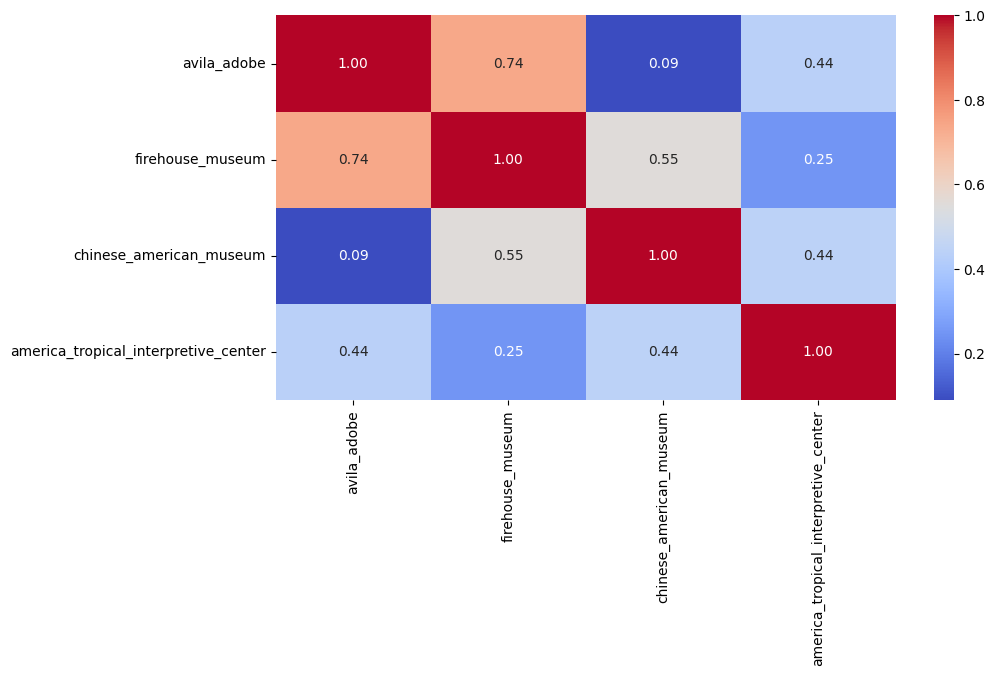

In [536]:
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_2016, annot=True, cmap='coolwarm', fmt=".2f")

13.	Побудувати графік ліній для кожного музею, показуючи їхню відвідуваність протягом 2017 року.

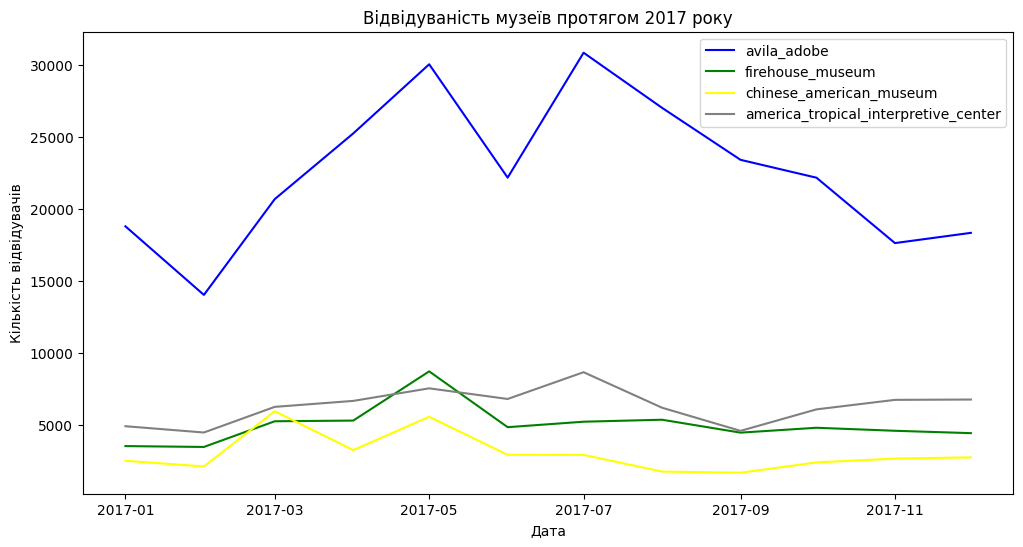

In [537]:
data_2017 = data[data['date'].dt.year == 2017]

plt.figure(figsize=(12, 6))
plt.plot(data_2017['date'], data_2017['avila_adobe'], label='avila_adobe', color='blue')
plt.plot(data_2017['date'], data_2017['firehouse_museum'], label='firehouse_museum', color='green')
plt.plot(data_2017['date'], data_2017['chinese_american_museum'], label='chinese_american_museum', color='yellow')
plt.plot(data_2017['date'], data_2017['america_tropical_interpretive_center'], label='america_tropical_interpretive_center', color='grey')

plt.xlabel('Дата')
plt.ylabel('Кількість відвідувачів')
plt.title('Відвідуваність музеїв протягом 2017 року')
plt.legend()
plt.show()

14.	Побудувати графіки розсіювання для кожного музею за 2018 рік

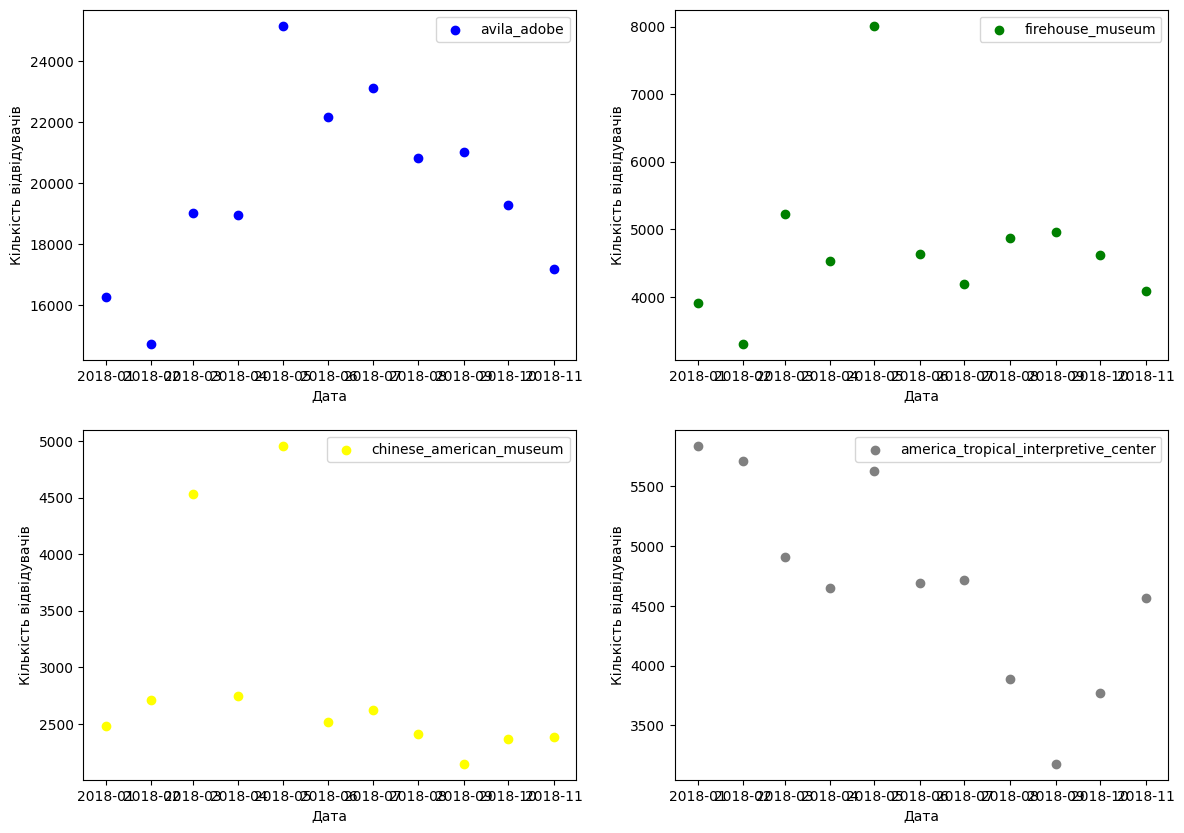

In [538]:
data_2018 = data[data['date'].dt.year == 2018]

plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
plt.scatter(data_2018['date'], data_2018['avila_adobe'], color='blue', label='avila_adobe')
plt.xlabel('Дата')
plt.ylabel('Кількість відвідувачів')
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(data_2018['date'], data_2018['firehouse_museum'], color='green', label='firehouse_museum')
plt.xlabel('Дата')
plt.ylabel('Кількість відвідувачів')
plt.legend()

plt.subplot(2, 2, 3)
plt.scatter(data_2018['date'], data_2018['chinese_american_museum'], color='yellow', label='chinese_american_museum')
plt.xlabel('Дата')
plt.ylabel('Кількість відвідувачів')
plt.legend()

plt.subplot(2, 2, 4)
plt.scatter(data_2018['date'], data_2018['america_tropical_interpretive_center'], color='grey', label='america_tropical_interpretive_center')
plt.xlabel('Дата')
plt.ylabel('Кількість відвідувачів')
plt.legend()

15.	Гістограма відвідуваності за місяцями кожного музею. Вивести 4 графіки: за 2014, 2015, 2016, 2017 роки. Графіки розташовані два зверху, два знизу, колір першого графіка - синій, другого зелений, третього жовтий, четвертого сірий.

У цій практичній роботі були виконані кроки для аналізу та візуалізації даних, такі як: зчитування датасету, обчислення середньої кількості відвідувачей в музеях, порівнювання кількість відвідувачів музеїв, побудова теплокарт кореляції, лінійних графіків та графіків розсіювання.